In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random
%matplotlib inline

In [3]:
#ex18, read data, x,y is the traning set. xTest, yTest is the testing set (actually the validation set)
data = np.loadtxt('hw1_18_train.dat')
N = len(data) # data numbers
n = len(data[0]) # x_n dimension + 1(y_n)
#xy.shape[0] or len(xy) calculate the rows
#xy.shape[1] or len(xy[0]) calculate the columns
y = data[:,-1]
x = np.ones((N,n)) # expanded x_n dimension, with x_0 =1
#http://stackoverflow.com/questions/8486294/how-to-add-an-extra-column-to-an-numpy-array
x[:,1:] = data[:,:-1]

data = np.loadtxt('hw1_18_test.dat')
N = len(data) # data numbers
n = len(data[0]) # x_n dimension + 1(y_n)
yTest = data[:,-1]
xTest = np.ones((N,n)) # expanded x_n dimension, with x_0 =1
xTest[:,1:] = data[:,:-1]

In [17]:
#ex18, find "bad points" using training set, but decide whether update or not using validation set
def errorEstimate(w,xVal,yVal):
    error = 0
    N = len(yVal)
    for j in range(N):
        if(yVal[j]*np.dot(w,xVal[j])<=0):
            error += 1
    return error/N

def pocketPLA(xTrain,yTrain,xVal,yVal):
    n = len(xTrain[0])
    N = len(yTrain)
    w = np.zeros(n)
    wPocket = w
    errorPocket = 1 #set the initial error to the maximum
    nUpdate = 0 
    while(nUpdate < 50):
        #random.seed()
        i = random.randint(0,N-1)
        if(yTrain[i]*np.dot(w,xTrain[i])<=0):
            w += xTrain[i]*yTrain[i]
            nUpdate += 1
            #Test set is actually validation set, it is using to tune the parameters
            error = errorEstimate(w,xVal,yVal)
            if(error < errorPocket):
                wPocket = w #update wPocket if w is better than the current one
                errorPocket = error 
    return errorPocket

errorRecords = []
for k in range(2000):
    errorRecords.append(pocketPLA(x,y,xTest,yTest))

2000
0.128843


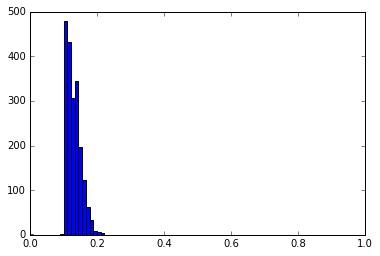

In [18]:
print(len(errorRecords))
print(np.average(errorRecords))
plt.hist(errorRecords,bins=90,range=(0,1))
plt.show()

In [23]:
#ex19, using PLA w_{50} to test the error
def errorEstimate(w,x_test,y_test):
    error = 0
    N = len(y_test)
    for j in range(N):
        if(y_test[j]*np.dot(w,x_test[j])<=0):
            error += 1
    return error/N

def PLA50(xTrain,yTrain,x_test,y_test):
    n = len(xTrain[0])
    N = len(yTrain)
    w = np.zeros(n)
    nUpdate = 0 
    while(nUpdate < 50):
        #random.seed()
        i = random.randint(0,N-1)
        if(yTrain[i]*np.dot(w,xTrain[i])<=0):
            w += xTrain[i]*yTrain[i]
            nUpdate += 1
       
    #Test set is really the test set, it is used to verify the training
    error = errorEstimate(w,x_test,y_test)
    return error

errorRecords = []
for k in range(2000):
    errorRecords.append(pocketPLA(x,y,xTest,yTest))

2000
0.129704


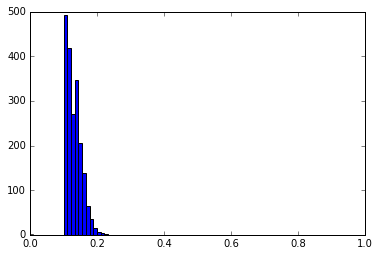

In [24]:
print(len(errorRecords))
print(np.average(errorRecords))
plt.hist(errorRecords,bins=90,range=(0,1))
plt.show()

In [25]:
#ex20, find "bad points" using training set, but decide whether update or not using validation set
def errorEstimate(w,xVal,yVal):
    error = 0
    N = len(yVal)
    for j in range(N):
        if(yVal[j]*np.dot(w,xVal[j])<=0):
            error += 1
    return error/N

def pocketPLA(xTrain,yTrain,xVal,yVal):
    n = len(xTrain[0])
    N = len(yTrain)
    w = np.zeros(n)
    wPocket = w
    errorPocket = 1 #set the initial error to the maximum
    nUpdate = 0 
    while(nUpdate < 100):
        #random.seed()
        i = random.randint(0,N-1)
        if(yTrain[i]*np.dot(w,xTrain[i])<=0):
            w += xTrain[i]*yTrain[i]
            nUpdate += 1
            #Test set is actually validation set, it is using to tune the parameters
            error = errorEstimate(w,xVal,yVal)
            if(error < errorPocket):
                wPocket = w #update wPocket if w is better than the current one
                errorPocket = error 
    return errorPocket

errorRecords = []
for k in range(2000):
    errorRecords.append(pocketPLA(x,y,xTest,yTest))

2000
0.110585


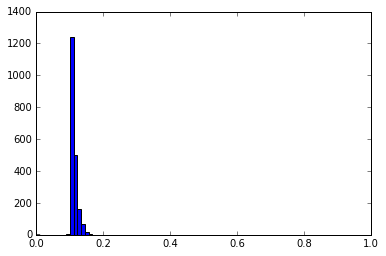

In [26]:
print(len(errorRecords))
print(np.average(errorRecords))
plt.hist(errorRecords,bins=90,range=(0,1))
plt.show()